<a href="https://colab.research.google.com/github/ClauRozasG/An-lisis-chat-Whatsapp/blob/main/Analisis_de_Whatsapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_table('_chat.txt', header=None, names=['Chat'])
df

,Chat
0,"[13/09/22, 00:19:49] GPC UPC - Preparación: ‎L..."
1,"[17/09/22, 14:40:22] ‪+51 989 383 357‬: Gente"
2,"[17/09/22, 14:40:32] ~ Lucas: Que"
3,"[17/09/22, 14:40:36] ‪+51 989 383 357‬: Saben ..."
4,"[17/09/22, 14:40:37] ~ José Carlos Aldana Garc..."
...,...
516,"[26/09/23, 03:12:55] ~ Lucas: Buenas madrugada..."
517,https://recolectar-fotos.vercel.app/
518,"‎[26/09/23, 03:12:55] ~ Lucas: ‎Video omitido"
519,"‎[26/09/23, 03:12:56] ~ Lucas: ‎Video omitido"


In [3]:
#como podemos observar, hay diferentes separadores para fecha, hora, remitente y el mensaje.
#se procederá a separarlos por columnas

fechas = []
horas = []
remitentes = []
mensajes = []

patron = r'\[(.*?)\]'
for chat in df['Chat']:
    match = re.match(patron, chat)
    if match:
        fecha_hora = match.group(1).split(', ')
        fecha = fecha_hora[0]
        hora = fecha_hora[1]

        # Mensaje remanente (sin fecha y hora)
        mensaje_restante = chat[match.end():].strip()

        # Encontrar el remitente y el mensaje
        partes = mensaje_restante.split(': ')
        if len(partes) > 1:
            remitente = partes[0]
            mensaje = ': '.join(partes[1:])
        else:
            remitente = ''
            mensaje = mensaje_restante

        fechas.append(fecha)
        horas.append(hora)
        remitentes.append(remitente)
        mensajes.append(mensaje)

# Crear un nuevo df con los datos procesados
nuevo_df = pd.DataFrame({'Fecha': fechas, 'Hora': horas, 'Remitente': remitentes, 'Mensaje': mensajes})

nuevo_df

,Fecha,Hora,Remitente,Mensaje
0,13/09/22,00:19:49,GPC UPC - Preparación,‎Los mensajes y las llamadas están cifrados de...
1,17/09/22,14:40:22,‪+51 989 383 357‬,Gente
2,17/09/22,14:40:32,~ Lucas,Que
3,17/09/22,14:40:36,‪+51 989 383 357‬,Saben algo de ese profe q botaron de la upc xq...
4,17/09/22,14:40:37,~ José Carlos Aldana Garcia,Fue
...,...,...,...,...
459,18/09/23,16:41:54,~ Damian,alguien ira a lo del gamejam hoy ?
460,21/09/23,10:05:02,~ Daniel,"En la semana auniveristiaria, están los de nue..."
461,22/09/23,09:30:26,~ Mathyu,Algún crack en Stata?
462,26/09/23,03:12:55,~ Lucas,"Buenas madrugadas equipo jeje, no se si me pue..."


In [9]:
nuevo_df.describe()

,Fecha,Hora,Remitente,Mensaje
count,464,464,464,464
unique,46,452,55,439
top,17/09/22,19:08:48,~ Lucas,xd
freq,86,2,92,6


In [10]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha      464 non-null    object
 1   Hora       464 non-null    object
 2   Remitente  464 non-null    object
 3   Mensaje    464 non-null    object
dtypes: object(4)
memory usage: 14.6+ KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [6]:
print(nuevo_df.columns)

Index(['Fecha', 'Hora', 'Remitente', 'Mensaje'], dtype='object')


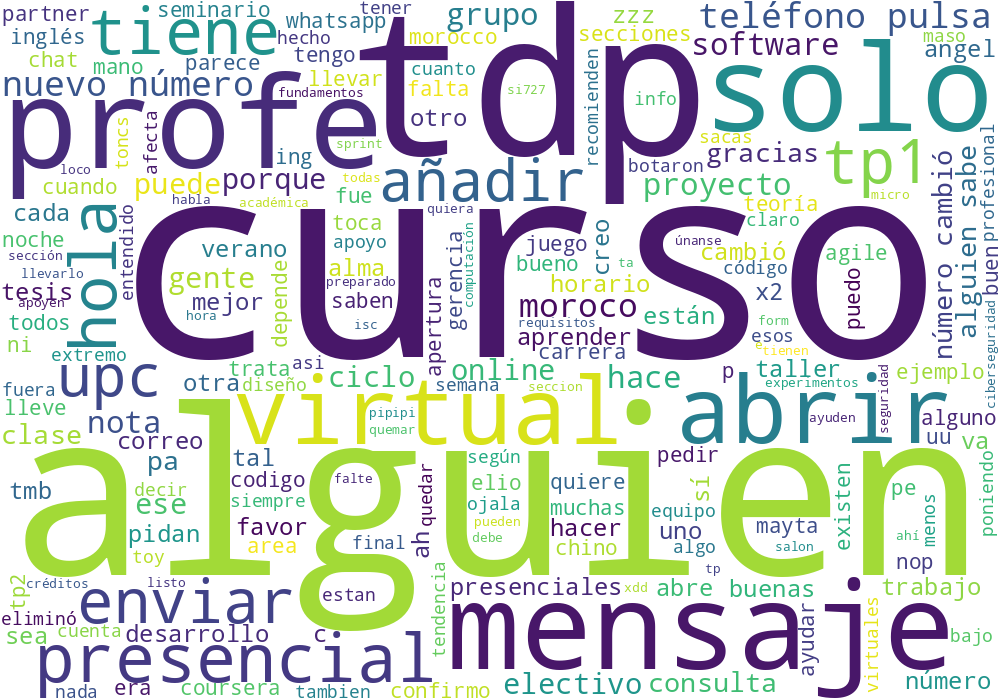

In [11]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v'])

for mensaje in nuevo_df['Mensaje'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

In [31]:
#Ahora crearemos una columna llamado turno para ver en qué turno se mandan más mensajes
def determinarTurnos(hora):
  if hora.hour>=12 and hora.hour <25:
    return 'Turno tarde'

  elif hora.hour>=0 and hora.hour <6 : return 'Turno madrugada'

  else: return 'Turno mañana'


nuevo_df['Turno']=nuevo_df['Hora'].apply(determinarTurnos)
nuevo_df

,Fecha,Hora,Remitente,Mensaje,Turno
0,13/09/22,1900-01-01 00:19:49,GPC UPC - Preparación,‎Los mensajes y las llamadas están cifrados de...,Turno madrugada
1,17/09/22,1900-01-01 14:40:22,‪+51 989 383 357‬,Gente,Turno tarde
2,17/09/22,1900-01-01 14:40:32,~ Lucas,Que,Turno tarde
3,17/09/22,1900-01-01 14:40:36,‪+51 989 383 357‬,Saben algo de ese profe q botaron de la upc xq...,Turno tarde
4,17/09/22,1900-01-01 14:40:37,~ José Carlos Aldana Garcia,Fue,Turno tarde
...,...,...,...,...,...
459,18/09/23,1900-01-01 16:41:54,~ Damian,alguien ira a lo del gamejam hoy ?,Turno tarde
460,21/09/23,1900-01-01 10:05:02,~ Daniel,"En la semana auniveristiaria, están los de nue...",Turno mañana
461,22/09/23,1900-01-01 09:30:26,~ Mathyu,Algún crack en Stata?,Turno mañana
462,26/09/23,1900-01-01 03:12:55,~ Lucas,"Buenas madrugadas equipo jeje, no se si me pue...",Turno madrugada


In [32]:
print(nuevo_df.columns)

Index(['Fecha', 'Hora', 'Remitente', 'Mensaje', 'Turno'], dtype='object')


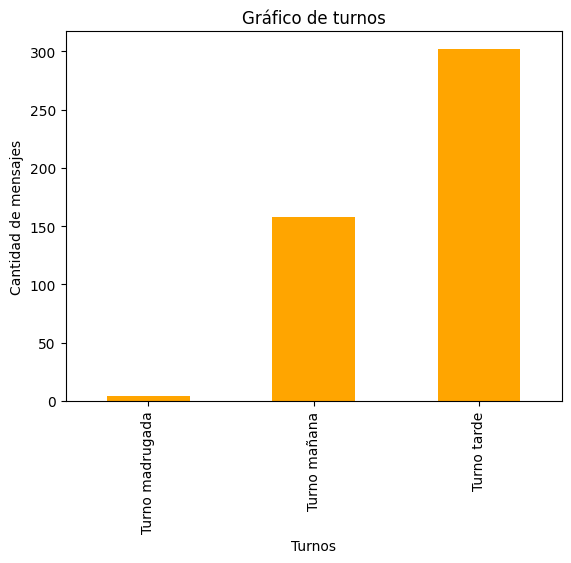

In [35]:
turnos= nuevo_df.groupby('Turno').size()
turnos.plot(kind='bar', color='orange')
plt.title('Gráfico de turnos')
plt.xlabel('Turnos')
plt.ylabel('Cantidad de mensajes')
plt.show()

In [38]:
nuevo_df['Fecha'] = pd.to_datetime(nuevo_df['Fecha'], format='%d/%m/%y')

In [40]:
def determinarAnio(anio):
  if anio.year==2022:
    return '2022'

  else: return '2023'

nuevo_df['Año'] = nuevo_df['Fecha'].apply(determinarAnio)
nuevo_df

,Fecha,Hora,Remitente,Mensaje,Turno,Año
0,2022-09-13,1900-01-01 00:19:49,GPC UPC - Preparación,‎Los mensajes y las llamadas están cifrados de...,Turno madrugada,2022
1,2022-09-17,1900-01-01 14:40:22,‪+51 989 383 357‬,Gente,Turno tarde,2022
2,2022-09-17,1900-01-01 14:40:32,~ Lucas,Que,Turno tarde,2022
3,2022-09-17,1900-01-01 14:40:36,‪+51 989 383 357‬,Saben algo de ese profe q botaron de la upc xq...,Turno tarde,2022
4,2022-09-17,1900-01-01 14:40:37,~ José Carlos Aldana Garcia,Fue,Turno tarde,2022
...,...,...,...,...,...,...
459,2023-09-18,1900-01-01 16:41:54,~ Damian,alguien ira a lo del gamejam hoy ?,Turno tarde,2023
460,2023-09-21,1900-01-01 10:05:02,~ Daniel,"En la semana auniveristiaria, están los de nue...",Turno mañana,2023
461,2023-09-22,1900-01-01 09:30:26,~ Mathyu,Algún crack en Stata?,Turno mañana,2023
462,2023-09-26,1900-01-01 03:12:55,~ Lucas,"Buenas madrugadas equipo jeje, no se si me pue...",Turno madrugada,2023


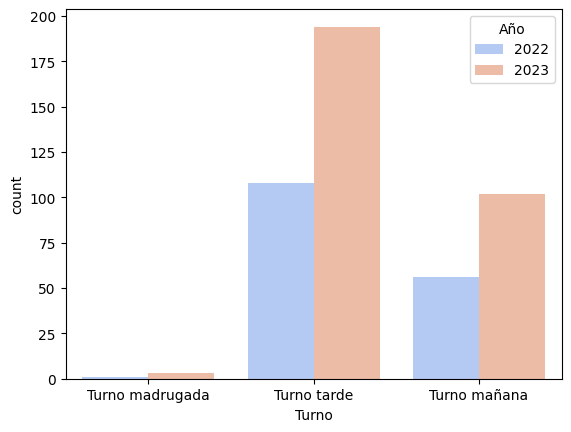

In [46]:
sns.countplot(data=nuevo_df, x='Turno', hue='Año', palette='coolwarm');